#  🟪 Can we predict Mental Ilness percentages for the future?

by Megin van Herk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import pyarrow
# import geopandas as gpd
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt

## 🟣 Domain understanding


Mental health disorders are complex and can take many forms. The underlying sources of the data presented in this entry apply specific definitions (which we describe in each relevant section), typically in accordance with WHO’s International Classification of Diseases (ICD-10). This broad definition incorporates many forms, including depression, anxiety, bipolar, eating disorders and schizophrenia.

## 🟣 Data sourcing


I found my data via Data.world. it linked back to the original soucre being, Ourworldindata:

https://ourworldindata.org/mental-health#all-charts-preview

## 🟣 Analytic approach

The dataset contain yearly data. I wish to predict future years using some sort of linear regression and/or Logistic Regression. I will also try K-Nearest Neighbors. Possible exponential regression?

Our target variable will be one of the disorders

## 🟣 Data requirements

The chosen analytic approach determines the data 
requirements. Specifically, the analytic methods to be used 
require certain data content, formats and representations, 
guided by domain knowledge.

For linear regression

- The variables should be linear
- Use a scatterplot to find out quickly if there is a linear relationship between  two variables.


For logistic regression

- No errors
- Continues variables
- No strong outliers


## 🟣 Data collection

In this Dataset we present the latest estimates of mental health disorder prevalence and the associated disease burden. Most of the estimates presented in this entry are produced by the Institute for Health Metrics and Evaluation and reported in their flagship Global Burden of Disease study.

https://ourworldindata.org/mental-health#all-charts-preview

After searching for mental illness datasets, this one had the most elaborate Data. Concering a percentage for different mental illness per country. Also stating in which year these numbers belong to. Giving the oppurtunity to make predictions for coming years.
I also found another dataset stating specific depression cases. It gave information individual people, where they worked, hwo many children they have and how much moeny they make And then saying if they have depression or not. I tested out some plots but everything was very unrelated to one another. I chose this Dataset over the other because this one has more eleborate numbers concering each country, future predictions with this dataset will be more accurate. 

In [3]:
df = pd.read_excel ("../Data/Mental health Depression disorder Data.xlsx")#reading excel file
df

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013.0,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014.0,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015.0,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016.0,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


The dataset contain various mental disorders, in percentages of the total population of various countries

We will be prediciting one of these disorders. To be able to see in to the future. to know what the percentages per country will be in the future.

## 🟣 Data understanding


To better understand the data its good to visualize the data. Its good to see what we can do with the data. The yearly data is good to visualize to see if there are patterns. There are allot of countries, we will be looking at mainly Netherlands and neighboring countries to limit the quantity of the data.

In [4]:
#First we filter the dataframe to just show us the netherlands
dfNL = df['Entity'] == 'Netherlands' #We make a new dataframe called dfNL, this will return true or false
NL = df[dfNL] #we then make this true or false statement into a dataframe
NL.shape #output dataframe size

(28, 10)

We can see our dataframe now has 28 rows instead of 6 thousand. 

In [5]:
NL.Year.unique() #show the unique values for the column Year

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017.])

Now we know the data goes from 1990 untill 2017, then we could possibly try to predict years >2017

I now want to see how all the mental illness columns difference throughout the years, by making a lineplot. First we will do depression

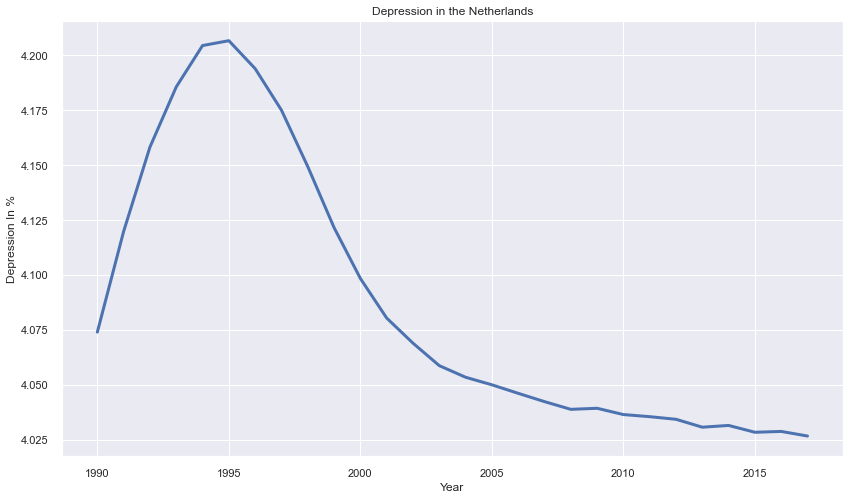

In [6]:
sns.set_style('darkgrid')# making the color of the plot a darker grid
sns.set(rc={'figure.figsize':(14,8)}) #the size of the plot
ax = sns.lineplot(data=NL, x ='Year', y = 'Depression (%)',
                  palette='viridis', #color pallete
                  legend='full', lw=3)
plt.ylabel('Depression In %')
plt.xlabel('Year')
plt.title('Depression in the Netherlands')
plt.show()

This plot shows a clear peak in 1995 and a steady decline untill 2017. The percentage stays around the 4% of the population in NL. 

We can look up a specific happening in 1995 that might have caused this peak in depression. The only 2 events I could easily find : 
- 18 to 23 July – The 1995 World Fencing Championships were held in The Hague.
- 1 to 11 August – The 18th World Scout Jamboree was held in Dronten.

These 2 events dont seem probably for causing a rise in depression. then again, the percentage only got raised form 4.075% to 4.20% . Not that much of a drastic increase.


Now I want to see all the Mental illness compared to one another. 

In [7]:
#we need to filter the dataframe and only use the columns we need, which is "year" and all the mental illnesses
NL2 = NL[['Year','Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]
#then we will melt the column into 1
dfm = NL2.melt('Year', var_name='Mental', value_name='value%') #Reshape the DataFrame from wide to long with melt
dfm 

,Year,Mental,value%
0,1990.0,Schizophrenia (%),0.372879
1,1991.0,Schizophrenia (%),0.373018
2,1992.0,Schizophrenia (%),0.373143
3,1993.0,Schizophrenia (%),0.373262
4,1994.0,Schizophrenia (%),0.373355
...,...,...,...
191,2013.0,Alcohol use disorders (%),0.737441
192,2014.0,Alcohol use disorders (%),0.745301
193,2015.0,Alcohol use disorders (%),0.754582
194,2016.0,Alcohol use disorders (%),0.765080


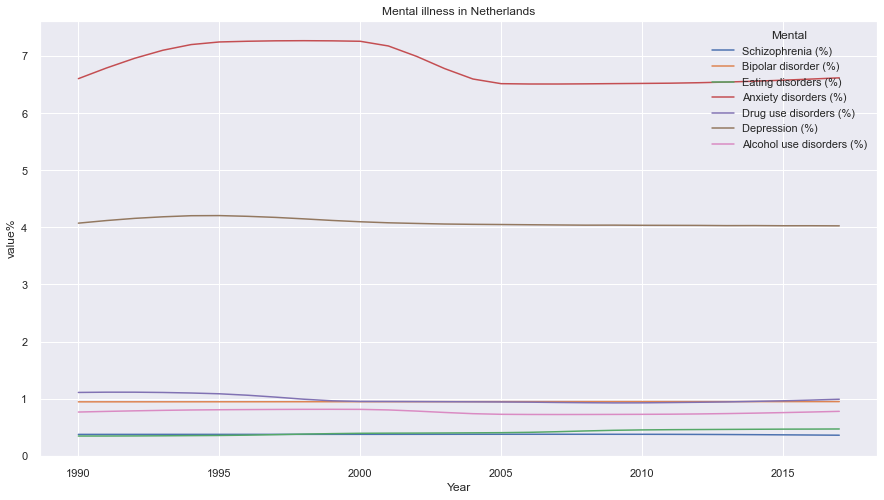

In [8]:
plt.gcf().set_size_inches(15, 8)#size of the plot
g = sns.lineplot(x="Year", y="value%", hue='Mental', data=dfm)#plot

plt.title('Mental illness in Netherlands')
plt.show()

This plot shows us that Anxiety disorder has the highest percentage out of all the mental illness. Depression has the second highest %. And the rest of the illness have the about the same percentage, around 1%. Lines like Eating disorder are very straight and doesnt move very much. You will probably get a high accuracy on predicting this. Its also interesting to see some financiel crisis such as the one from 2008, do not affect the numbers

Now I would like to see if other countries have very different data or not.

In [9]:
#we will repeat the process for NL but then for Morocco
dfMO = df['Entity'] == 'Morocco' #We make a new dataframe called dfMO, this will return true or false
MO = df[dfMO] #we then make this true or false statement into a dataframe
#we need to filter the dataframe and only use the columns we need, which is "year" and all the mental illnesses
MO2 = MO[['Year','Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]
#then we will melt the column into 1
dfmo = MO2.melt('Year', var_name='Mental', value_name='value%') #Reshape the DataFrame from wide to long with melt


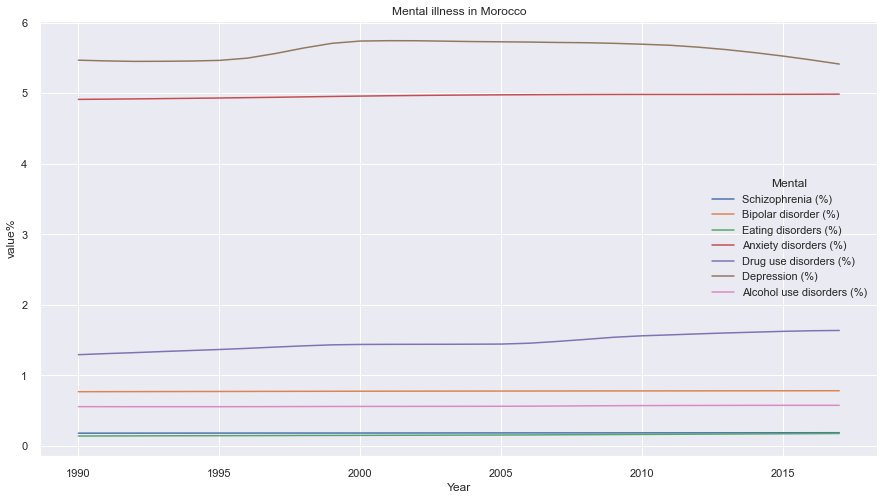

In [64]:
plt.gcf().set_size_inches(15, 8)#size of the plot
g = sns.lineplot(x="Year", y="value%", hue='Mental', data=dfmo)#plot

plt.title('Mental illness in Morocco')
plt.show()

Morocco is a very different country compared to the netherlands. While netherlands has anxiety disorders has the highest percentage, in Morocco depression takes the highest rate. While the lower disorders are both similar.

I would like to get a closer look at the depression line, since it seems to be allot different than the netherlands curve of depression

Text(0.5, 0, 'Year')

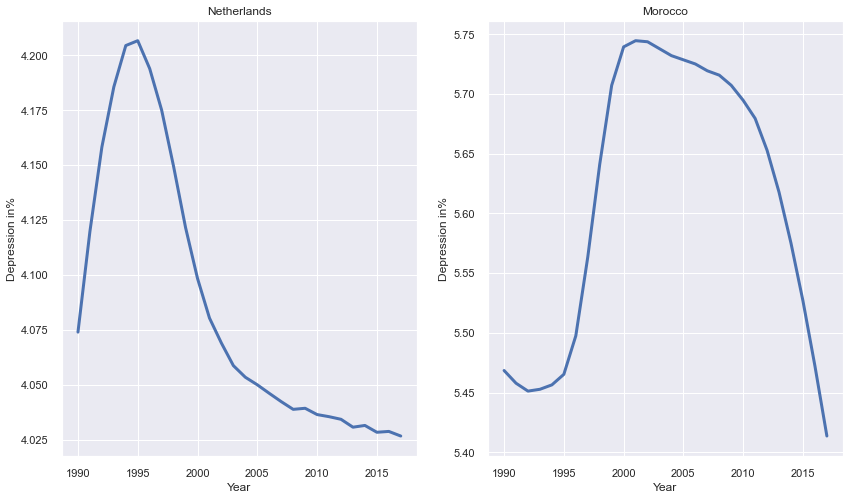

In [11]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.lineplot(data=NL, x ='Year', y = 'Depression (%)',
                  palette='viridis', #color pallete
                  legend='full', lw=3)
plt.title("Netherlands")
plt.ylabel('Depression in%')
plt.xlabel('Year')
plt.subplot(1, 2, 2) # index 2
sns.lineplot(data=MO, x ='Year', y = 'Depression (%)',
                   #color pallete
                  legend='full', lw=3)
plt.title("Morocco")
plt.ylabel('Depression in%')
plt.xlabel('Year')


Its interesting to see the difference in the line curve. After their peak they both go down. Morocco in general has a higher percentage.

Text(0.5, 1.0, 'Madagascar depression in %')

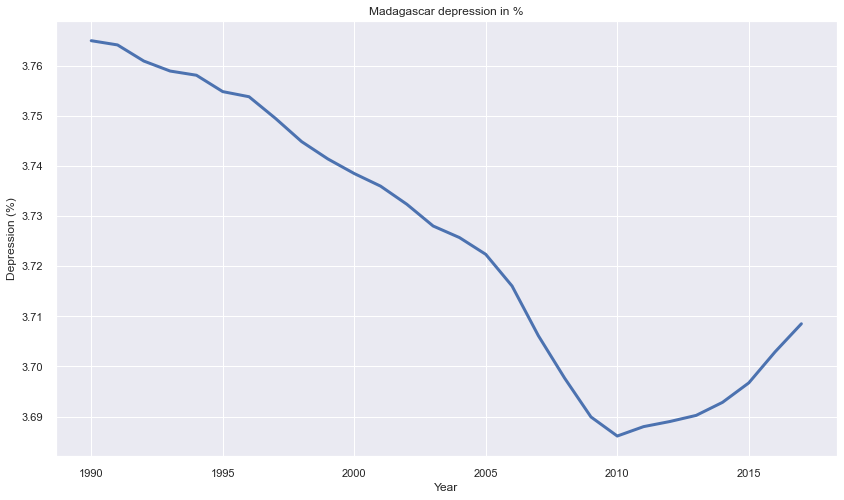

In [58]:
#we will repeat the process for NL but then for Madagascar
dfMA = df['Entity'] == 'Madagascar' #We make a new dataframe called dfMA, this will return true or false
MA = df[dfMA] #we then make this true or false statement into a dataframe
sns.lineplot(data=MA, x ='Year', y = 'Depression (%)',
                   #color pallete
                  legend='full', lw=3)
plt.title('Madagascar depression in %')

The Madagascar line is actually very logical, The dip in 2010 makes sense with just a little google search:
https://reliefweb.int/report/madagascar/madagascar-year-crisis
A coup happening in 2009 and a reformed government in 2010 probably explains the sudden drop. Or it could not be not related at all.

I want to see each country compared to one another, but there are allot of countries

In [13]:
df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern 

## 🟣 Data preparation

We can always check if there are correlations between columns. Although comparing different mental disorders is a bit questionable

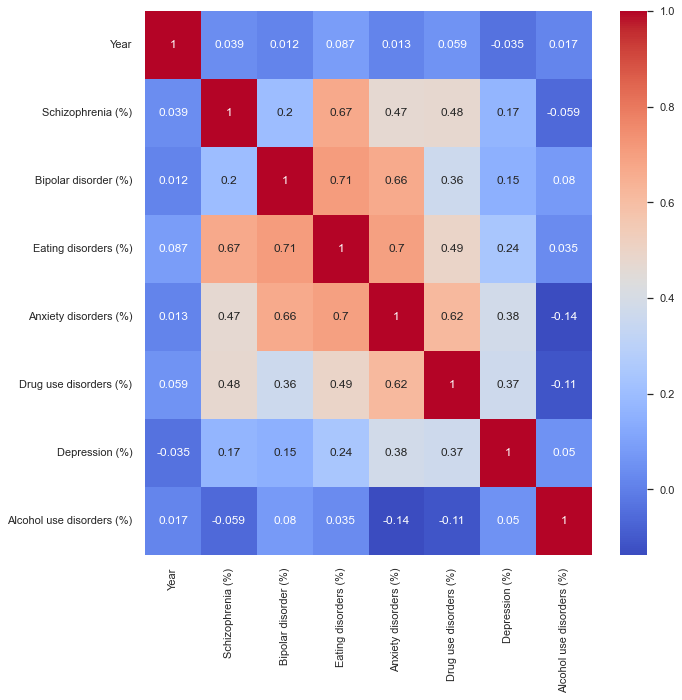

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Its not surprising to see some of the disorders have high correlation, as in the previous lineplots you could clearly see some disorders sticking together. We might be able to make a prediction on these. Lets see which disorder fits best with one another:

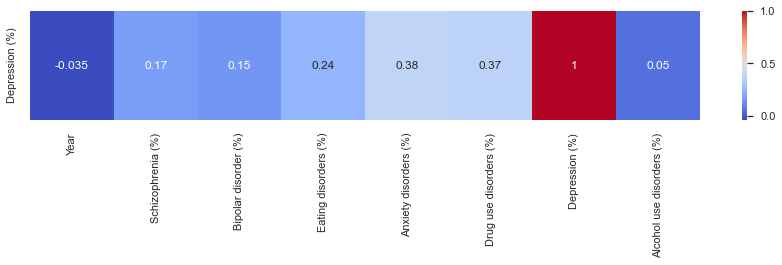

In [15]:
#checking depression disorder against all countries
winning_correlation = df.corr()['Depression (%)'].to_frame().T
plt.figure(figsize=(15,2))
sns.heatmap(winning_correlation, annot=True, cmap="coolwarm")
plt.show()

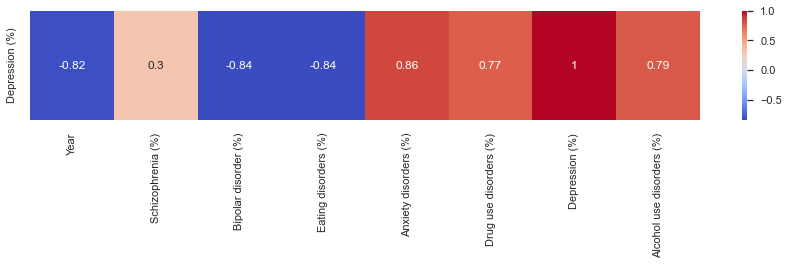

In [16]:
#checkin depression disorder against just the netherlands
winning_correlation = NL.corr()['Depression (%)'].to_frame().T
plt.figure(figsize=(15,2))
sns.heatmap(winning_correlation, annot=True, cmap="coolwarm")
plt.show()

We will use <b> NL depression disorder </b> as our <b>target variable</b>. we will compare it with the 3 highest other disorders, Anxiety, Drug use and Alcohol use

Because all the number are a percentage and differ allot. We will normalize the data. Normalizing ensures that your data looks, reads, and can be utilized the same way across all of the records

In [17]:
from sklearn import preprocessing

In [18]:
#I will make a new variable containg just the data we need for modelling
NLT = NL[['Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]
scaler = preprocessing.MinMaxScaler()
names = NLT.columns
norm = scaler.fit_transform(NLT)
norm_NLT = pd.DataFrame(norm, columns=names)
norm_NLT.head()

,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0.123447,0.975394,0.262833,0.476640
1,0.370417,1.000000,0.517568,0.597804
2,0.594355,0.998693,0.730911,0.707572
3,0.779593,0.972786,0.883078,0.800535
4,0.910187,0.922631,0.987668,0.871970


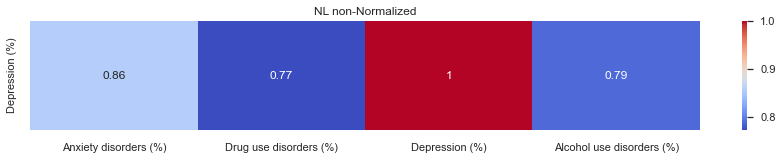

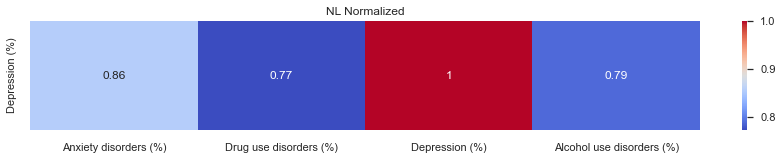

In [19]:

winning_correlation = NLT.corr()['Depression (%)'].to_frame().T #netherlands depression nor normalized
plt.figure(figsize=(15,2))
sns.heatmap(winning_correlation, annot=True, cmap="coolwarm")
plt.title('NL non-Normalized')
plt.show()

plt.figure(figsize=(15,2))

winning_correlation = norm_NLT.corr()['Depression (%)'].to_frame().T #netherland normalzied data
sns.heatmap(winning_correlation, annot=True,cmap="coolwarm")
plt.title('NL Normalized')
plt.show()

These heatmaps show there is no difference between normalized data or non normalized data.

## 🟣 Pre processing

I want to be able to see possible future percentages. So we will do that with exponential growth. When looking at the data, we only have the percentages of cases per year, and not the growth factor. The best method to find the growth factor from empirical daily observations is to use a statistical model called Linear Regression.

In [79]:
import statsmodels.api as sm
X = NL[['Year']]
Y = NL[['Depression (%)']]

In [80]:
#X = df[['Anxiety disorders (%)','Drug use disorders (%)','Alcohol use disorders (%)']]
X = sm.add_constant(X)# adding a constant

C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 🟣 Modelling

In [81]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Depression (%)   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     53.86
Date:                Wed, 25 May 2022   Prob (F-statistic):           8.57e-08
Time:                        12:05:18   Log-Likelihood:                 54.195
No. Observations:                  28   AIC:                            -104.4
Df Residuals:                      26   BIC:                            -101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5548      1.699      9.744      0.0

Make the prediction function based on the table

The formula for linear regression is <b>y = a + b * x </b>

The statsmodels table gives the values for a and b under coef (in the middle):

- The value const is the value for a in our Linear Regression: 16.5548
- The value Time is the value for b in our Linear Regression: -0.0062

- we said that the Linear Regression’s a is the log of the initial value
- we said that the Linear Regression’s b is the log of the Growth Factor

We can then apply these numbers to the formula. To get a result for a specific year

###### info gathered from (https://towardsdatascience.com/modeling-exponential-growth-49a2b6f22e1f)